In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
path=("C:\\Users\\lenovo\\Downloads\\User 2.xlsx")

In [3]:
data=pd.read_excel("C:\\Users\\lenovo\\Downloads\\User 2.xlsx")


In [4]:
item_desc=pd.read_excel(path,"item_desc")

In [5]:
data.head(20)

,Unnamed: 0,USER,ITEM,RATING
0,1,A3ZHSTP095UTZ,B006GWO5WK,4
1,2,A3FGOOWBV8SUCA,B007ZGO7EM,3
2,3,A38P3PPW3JXA3E,849922070,3
3,4,AZM3ZACWGRCC0,B0054JZC6E,1
4,5,A1H1KUCQY7TX6Y,375831002,5
5,6,A28J0047O2LM64,345803485,2
6,7,A3LZA0ZL5IA0MS,B003ELYQGG,4
7,8,A2U7DXDNYBBLQJ,B001KXZ808,4
8,9,AYOJ4CX2CZP7Y,439023483,3
9,10,AO8RJE8TIFJZA,B002Y27P3M,4


 #removing unrelated column

In [6]:
del data["Unnamed: 0"] 

In [7]:
data.head()

,USER,ITEM,RATING
0,A3ZHSTP095UTZ,B006GWO5WK,4
1,A3FGOOWBV8SUCA,B007ZGO7EM,3
2,A38P3PPW3JXA3E,849922070,3
3,AZM3ZACWGRCC0,B0054JZC6E,1
4,A1H1KUCQY7TX6Y,375831002,5


AttributeError: module 'matplotlib' has no attribute 'show'

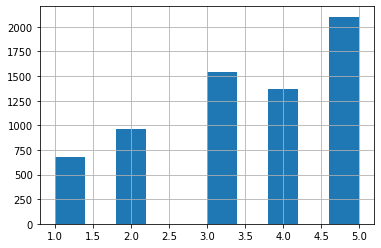

In [38]:
data["RATING"].hist()
plt.show()

In [9]:
data.shape

(6667, 3)

#checking for null values .
#no null values in data

In [10]:
data.isnull().sum()

USER      0
ITEM      0
RATING    0
dtype: int64

In [11]:
data.describe()

,RATING
count,6667.000000
mean,3.487476
std,1.335865
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


#Calculating the total rating for each item and merging with main dataframe

In [12]:
Total_Rating=(data.groupby(by=['ITEM'])["RATING"].count().reset_index().rename(columns={"RATING":"TOTAL_RATING"})[["ITEM","TOTAL_RATING"]])

In [13]:
Total_Rating.head()

,ITEM,TOTAL_RATING
0,7386648,78
1,7442920,81
2,7444117,85
3,141039280,143
4,307943232,43


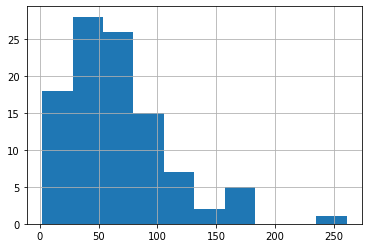

In [14]:
Total_Rating["TOTAL_RATING"].hist()

Total rating for all items from 0 to 250

In [15]:
Ratingdata=data.merge(Total_Rating,left_on="ITEM",right_on="ITEM",how="left")

In [16]:
Ratingdata.head()

,USER,ITEM,RATING,TOTAL_RATING
0,A3ZHSTP095UTZ,B006GWO5WK,4,131
1,A3FGOOWBV8SUCA,B007ZGO7EM,3,54
2,A38P3PPW3JXA3E,849922070,3,76
3,AZM3ZACWGRCC0,B0054JZC6E,1,10
4,A1H1KUCQY7TX6Y,375831002,5,108


#fixing threshold value 70.So recommending only items with value more than 70. low rated items are not recommended 

In [17]:
threshold=70


In [18]:
Rating_popular_item=Ratingdata.query("TOTAL_RATING >= @threshold")
Rating_popular_item.head()

,USER,ITEM,RATING,TOTAL_RATING
0,A3ZHSTP095UTZ,B006GWO5WK,4,131
2,A38P3PPW3JXA3E,849922070,3,76
4,A1H1KUCQY7TX6Y,375831002,5,108
5,A28J0047O2LM64,345803485,2,96
6,A3LZA0ZL5IA0MS,B003ELYQGG,4,117


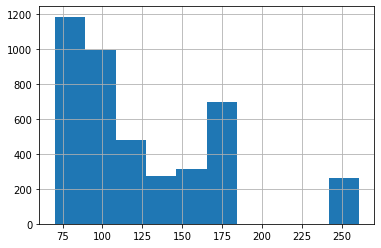

In [19]:
Rating_popular_item["TOTAL_RATING"].hist()

Filtered Rating above 70

In [20]:
Rating_popular_item.shape

(4191, 4)

In [21]:
#Ratingdata=data.merge(Total_Rating,left_on="ITEM",right_on="ITEM",how="left")
Rating_popular_item=Rating_popular_item.merge(item_desc,left_on="ITEM",right_on="ITEM",how="left")

In [22]:
Rating_popular_item.head()

,USER,ITEM,RATING,TOTAL_RATING,title
0,A3ZHSTP095UTZ,B006GWO5WK,4,131,Akhiyon Se Goli Maare\t\t\t\t\t\t\t\t\t\t\t\t\...
1,A38P3PPW3JXA3E,849922070,3,76,Pedro's Cog Wrench\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
2,A1H1KUCQY7TX6Y,375831002,5,108,Hijacked: Flight 285\t\t\t\t\t\t\t\t\t\t\t\t\t
3,A28J0047O2LM64,345803485,2,96,Great Books\t
4,A28J0047O2LM64,345803485,2,96,Great Books\t\t\t\t\t\t\t\t\t


In [23]:
def clean_title(statement):
    return ' '.join(re.sub("/@%&|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", statement).split())

In [24]:
import re

In [25]:
for i in Rating_popular_item['title'].index:
    Rating_popular_item['title'][i] = clean_title(Rating_popular_item['title'][i])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#collabrating filtering

#using csr_matrix

In [26]:
from scipy.sparse import csr_matrix
Rating_popular_item=Rating_popular_item.drop_duplicates(["USER","ITEM"])
Rating_popular_item_pivot=Rating_popular_item.pivot(index="title",columns="USER",values="TOTAL_RATING").fillna(0)
Rating_popular_item_matrix=csr_matrix(Rating_popular_item_pivot.values)


In [27]:
Rating_popular_item_pivot.head()

USER,A03208803KA5HCUYS17Z1,A1002LJCM20EZ5,A100WO06OQR8BQ,A103BJIOJSDJL1,A1041053SID37WN8GTT8,A105A034ZG9EHO,A10938QNO7IYIB,A10ANCEOWK5GBN,A10BZSGALQPS0V,A10C5SL817NSB7,...,AZQWH5DUZQIZ7,AZRJH4JFB59VC,AZV2U6GU5QA6C,AZVVD2TRCFHRL,AZW1Z3FJTV66W,AZWC9XAY34IPW,AZWG3PF80735Q,AZXEZRXZQL1H2,AZXS6P5QWNMLC,AZZYW4YOE1B6E
title,,,,,,,,,,,,,,,,,,,,,
Akhiyon Se Goli Maare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AmazonBasics Apple Certified Lightning to USB Cable 3 Feet 0 9 Meter Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AmazonBasics High Speed HDMI Cable 15 Feet 4 6 Meters Supports Ethernet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Avengers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comprehensive ST Series USB Cable 2 0 A to B Cable 25 FT,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN

#item_based

In [28]:
from sklearn.neighbors import NearestNeighbors

model_knn= NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(Rating_popular_item_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [29]:
#Rating_popular_item_pivot.iloc[query_index,:].values.reshape(1,-1)

In [30]:
query_index=np.random.choice(Rating_popular_item_pivot.shape[0])
print(query_index)
distances,indices=model_knn.kneighbors(Rating_popular_item_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)


0


In [31]:
Rating_popular_item_pivot.index[query_index]

'Akhiyon Se Goli Maare'

FOR THE ITEM i THESES ARE THE TOP 5 ITEMS RECOMMENDED.

In [32]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendations for {0}:\n".format(Rating_popular_item_pivot.index[query_index]))
    else:
        print("{0}:{1},with distance of {2}:".format(i,Rating_popular_item_pivot.index[indices.flatten()[i]],distances.flatten()))
        print("\n")

Recommendations for Akhiyon Se Goli Maare:

1:KEEN Men s Targhee II Mid Waterproof Hiking Boot,with distance of [0.         0.92185353 0.93443037 0.93443037 0.96336437]:


2:Kindle Book,with distance of [0.         0.92185353 0.93443037 0.93443037 0.96336437]:


3:Injustice 2,with distance of [0.         0.92185353 0.93443037 0.93443037 0.96336437]:


4:Eternium,with distance of [0.         0.92185353 0.93443037 0.93443037 0.96336437]:




#user_based

In [33]:
from scipy.sparse import csr_matrix
Rating_popular_item=Rating_popular_item.drop_duplicates(["USER","ITEM"])
Rating_popular_item_pivot=Rating_popular_item.pivot(index="USER",columns="title",values="TOTAL_RATING").fillna(0)
Rating_popular_item_matrix=csr_matrix(Rating_popular_item_pivot.values)


In [34]:
from sklearn.neighbors import NearestNeighbors

model_knn= NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(Rating_popular_item_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [35]:
query_index=np.random.choice(Rating_popular_item_pivot.shape[0])
print(query_index)
distances,indices=model_knn.kneighbors(Rating_popular_item_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)


2834


In [36]:
Rating_popular_item_pivot.index[query_index]

'A8P6GIIQ6YQV8'

In [37]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendations for {0}:\n".format(Rating_popular_item_pivot.index[query_index]))
    else:
        print("{0}:{1},with distance of {2}:".format(i,Rating_popular_item_pivot.index[indices.flatten()[i]],distances.flatten()))
        print("\n")

Recommendations for A8P6GIIQ6YQV8:

1:A2W5B60CW0RUHU,with distance of [0. 0. 0. 0. 0.]:


2:A14686WCLGNN2N,with distance of [0. 0. 0. 0. 0.]:


3:A3C713428J4MJ7,with distance of [0. 0. 0. 0. 0.]:


4:A2CYUEFLYG72CW,with distance of [0. 0. 0. 0. 0.]:


